# Projeto 1 Turing Academy - Bruno Vidigal
## Análise e limpeza de dados


Primeiro, faço a importação das bibliotecas para manipulação, limpeza, análise e visualização de dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!ls #diretório com o notebook e o arquivo .csv

README.md                      projeto1_TA_BrunoVidigal.ipynb
df_athlete_events.csv


Usando o `.read_csv()` do pandas, leio a base `'df_athlete_events.csv'` e com o comando `.drop_duplicates()` já elimino da base dados duplicados.

In [3]:
df = pd.read_csv('df_athlete_events.csv') #leitura dos dados usando pandas
df.drop_duplicates(inplace=True) #limpeza inicial retirando dados duplicados da base

Aplicando os comandos `.head()`, `.info()`, `.describe()`, ganho um panorama geral da base, identifico as informações nela contidas, percebo padrões e inconsistências desde o início. Por isso é importante começar com esses comandos.

In [4]:
df.head(10)

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
2,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
3,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
4,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
5,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
6,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
7,17,Paavo Johannes Aaltonen,MALE,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
8,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
9,17,Paavo Johannes Aaltonen,M,32.0,175.0,64.0,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Team All-Around,Bronze


In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45554 entries, 0 to 45566
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Athlete_ID  45554 non-null  int64  
 1   Name        45554 non-null  object 
 2   Sex         45554 non-null  object 
 3   Age         44585 non-null  float64
 4   Height      35547 non-null  float64
 5   Weight      34926 non-null  object 
 6   Team        45554 non-null  object 
 7   NOC         45554 non-null  object 
 8   Games       45554 non-null  object 
 9   Year        45554 non-null  int64  
 10  Season      45554 non-null  object 
 11  City        45554 non-null  object 
 12  Sport       45554 non-null  object 
 13  Event       45554 non-null  object 
 14  Medal       39793 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 5.6+ MB


In [6]:
df.describe()

,Athlete_ID,Age,Height,Year
count,45554.000000,44585.000000,3.554700e+04,45554.000000
mean,69130.039075,25.847774,9.729939e+02,1972.410348
std,38867.266562,5.957630,3.446781e+04,94.207020
min,4.000000,10.000000,1.320000e+02,-2992.000000
25%,36108.000000,22.000000,1.700000e+02,1952.000000
50%,68632.000000,25.000000,1.780000e+02,1984.000000
75%,103181.500000,29.000000,1.850000e+02,2002.000000
max,135563.000000,73.000000,1.976779e+06,2016.000000


In [7]:
df.describe(include = object)

,Name,Sex,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal
count,45554,45554,34926,45554,45554,45554,45554,45554,45554,45554,39793
unique,32905,6,188,602,201,51,5,43,66,760,4
top,"Michael Fred Phelps, II",M,70.0,United States,USA,2008 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,28,31651,1443,5515,5957,2321,38594,4091,4811,1379,13317


Apenas com esses comandos, vemos quais as informações que temos na base, como `Name`, `Age`, `Year`, `Medal` e outras.

Além disso, já é possível identificar: 

 - dados faltantes (representados por `NaN`);

 - dados suspeitos e inconsistentes, como o fato de que a coluna de peso do atleta (`Weight`) está classificada como `object`, dado categórico, quando o esperado é que seja um dado numérico, no caso, `float64`;

 - na coluna `Sex`, percebe-se que há escritas distintas para diferenciar homens e mulheres, com mais do que 2 valores únicos e algo análogo ocorre em `Season` e `Medal`. Possivelmente outros dados categóricos tenham problemas parecidos ainda não identificáveis;

 - nos dados numéricos, números absurdos e suspeitos se destacam em `Age`, `Height` e `Year`, olhando principalmente para os valores de `max` e `min` indicados no `.describe()`.

Com isso em vista, é necessário fazer uma limpeza da base para tornar as informações consistentes e no futuro conseguir uma análise dos dados confiável.

## Limpeza dos dados
Começando com a limpeza da base, dados faltantes serão ou excluídos ou substituídos de forma a não perder outras informações a depender de cada caso, dados categóricos serão padronizados adequadamente e outros ajustes serão feitos. Depois disso, será analisado novamente a base para identificar se ainda há o que limpar e finalmente é possível proceder para a análise e visualização dos dados.

## Dados categóricos

### Ajeitando as strings dos dados categóricos:

In [8]:
print("Sex column unique values:")
print(pd.Series(df.Sex.unique()), end='\n\n')

Sex column unique values:
0                          M
1                       MALE
2                     FEMALE
3                          F
4    Vic vai te dar um socao
5          P&D >> Comunidade
dtype: object



In [9]:
print("Season column unique values:")
print(pd.Series(df.Season.unique()), end='\n\n')

Season column unique values:
0            Summer
1            Winter
2    #ForaBolsonaro
3         Ele nunca
4           Ele não
dtype: object



In [10]:
print("Medal column unique values:")
print(pd.Series(df.Medal.unique()), end='\n\n')

Medal column unique values:
0      Gold
1       NaN
2    Bronze
3    Silver
4    Nelson
dtype: object



In [11]:
print("City column unique values:")
print(pd.Series(df.City.unique()), end='\n\n')

City column unique values:
0                      Paris
1                Albertville
2                  Antwerpen
3                      Sochi
4                     London
5                   Helsinki
6                Lillehammer
7             Salt Lake City
8                     Torino
9                    Beijing
10                     Seoul
11                   Atlanta
12                      Oslo
13              Squaw Valley
14                 Stockholm
15                 Melbourne
16            Rio de Janeiro
17                    Sydney
18                    Athina
19                    Moskva
20               Los Angeles
21                 Barcelona
22                    Berlin
23                     Tokyo
24                      Roma
25                    Munich
26                  Chamonix
27                 St. Louis
28              Sankt Moritz
29                    Nagano
30                   Calgary
31                  Grenoble
32                  Montreal
33              

Vemos que alguns valores estão fora de padrão na coluna `Sex` e observamos também algumas entradas incoerentes (e um tanto quanto cômicas) em `Sex`, `Season` e `Medal`, além de uma entrada incoerente em `City`. Vamos substituir os valores que podem ser substituídos e avaliar como proceder com os dados incoerentes.

### Substituição e exclusão dos dados categóricos

### Sex

In [12]:
#substituindo 'M' por 'MALE'
df['Sex'].replace('M', 'MALE', inplace=True)

#substituindo 'F' por 'FEMALE'
df['Sex'].replace('F', 'FEMALE', inplace=True)

In [13]:
#identificando quantas entradas têm 'Vic vai te dar um socao' como a informação de sexo
len(df[df['Sex'] == 'Vic vai te dar um socao'])

312

In [14]:
#identificando quantas entradas têm 'P&D >> Comunidade' como a informação de sexo
len(df[df['Sex'] == 'P&D >> Comunidade'])

333

Vemos que o número de entradas com valores incoerentes, relativo ao tamanho da base, é muito pequeno. Logo, dados como esses em que também seria questionável substituir, por exemplo, pela moda, como `'MALE'` ou `'FEMALE'`, já que são definições de gênero dos atletas, que são informações em que é importante que sejam precisas, podem ser excluídos. Entretanto é sempre importante verificar se não representam uma parcela muito grande da base para não perder muitos dados ao excluir essas entradas.

In [15]:
#excluindo as entradas de 'Sex' com valores incoerentes
indexVic = df[df['Sex'] == 'Vic vai te dar um socao'].index
indexPeD = df[df['Sex'] == 'P&D >> Comunidade'].index

df.drop(indexVic, inplace=True)
df.drop(indexPeD, inplace=True)

In [16]:
print("Sex column unique values:")
print(pd.Series(df.Sex.unique()), end='\n\n')

Sex column unique values:
0      MALE
1    FEMALE
dtype: object



Verificamos que agora os dados de `Sex` estão coerentes e com a mesma representação, o que será conveniente para futura análise.

### Season

In [17]:
#identificando quantas entradas têm '#ForaBolsonaro' como a informação de temporada
len(df[df['Season'] == '#ForaBolsonaro'])

71

In [18]:
#identificando quantas entradas têm 'Ele nunca' como a informação de temporada
len(df[df['Season'] == 'Ele nunca'])

29

In [19]:
#identificando quantas entradas têm 'Ele não' como a informação de temporada
len(df[df['Season'] == 'Ele não'])

50

Novamente o número de entradas incoerentes é baixo e podem ser excluídas.

In [20]:
#excluindo as entradas de 'Season' com valores incoerentes
indexForaBozo = df[df['Season'] == '#ForaBolsonaro'].index
indexEleNunca = df[df['Season'] == 'Ele nunca'].index
indexEleNao = df[df['Season'] == 'Ele não'].index

df.drop(indexForaBozo, inplace=True)
df.drop(indexEleNunca, inplace=True)
df.drop(indexEleNao, inplace=True)

In [21]:
print("Season column unique values:")
print(pd.Series(df.Season.unique()), end='\n\n')

Season column unique values:
0    Summer
1    Winter
dtype: object



Assim como em `Sex`, os dados de `Season` agora estão corretos e no formato adequado para futura análise.

### Medal

In [22]:
#identificando quantas entradas têm 'Nelson' como a informação de medalha
len(df[df['Medal'] == 'Nelson'])

165

Neste caso, como a coluna de `Medal`, com informações sobre premiações de medalhas, tem uma opção de `NaN`, ou seja, o atleta não recebeu medalha, podemos, ao invés de excluir as informações, substituir por `NaN`, o atleta não recebeu medalha.

In [23]:
#Substituindo 'Nelson' por NaN
df['Medal'].replace('Nelson', np.nan, inplace=True)

In [24]:
print("Medal column unique values:")
print(pd.Series(df.Medal.unique()), end='\n\n')

Medal column unique values:
0      Gold
1       NaN
2    Bronze
3    Silver
dtype: object



Agora `Medal` está com os valores corretos de medalhas ou a não-premiação de medalhas.

### City

In [25]:
#identificando quantas entradas têm '######' como a informação de cidade
len(df[df['City'] == '######'])

132

In [26]:
df[df['City'] == '######'] #mostrando as entradas na base em que '######' é a cidade

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1565,5815,"Gillian ""Jill"" Atkins",FEMALE,29.0,165.0,65.0,Great Britain,GBR,1992 Summer,1992,Summer,######,Hockey,Hockey Women's Hockey,Bronze
2158,7903,Jane Louise Barkman (-Brown),FEMALE,17.0,169.0,61.0,United States,USA,1968 Summer,1968,Summer,######,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Gold
3016,10360,Liubov Ivanivna Berezhna-Odynokova,FEMALE,20.0,167.0,61.0,Soviet Union,URS,1976 Summer,1976,Summer,######,Handball,Handball Women's Handball,Gold
3211,10955,Annemieke Marileen Bes,FEMALE,30.0,177.0,70.0,Netherlands,NED,2008 Summer,2008,Summer,######,Sailing,Sailing Women's Three Person Keelboat,Silver
3435,11671,"Suzanne Brigit ""Sue"" Bird",FEMALE,35.0,175.0,66.0,United States,USA,2016 Summer,2016,Summer,######,Basketball,Basketball Women's Basketball,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44090,131311,Jenny Wolf (-Lotze),FEMALE,31.0,172.0,75.0,Germany,GER,2010 Winter,2010,Winter,######,Speed Skating,Speed Skating Women's 500 metres,Silver
44217,131657,Katarzyna Bronisawa Woniak,FEMALE,20.0,173.0,61.0,Poland,POL,2010 Winter,2010,Winter,######,Speed Skating,Speed Skating Women's Team Pursuit (6 laps),Bronze
44378,132068,Xu Jing,FEMALE,21.0,169.0,hsuahusahu,China,CHN,2012 Summer,2012,Summer,######,Archery,Archery Women's Team,Silver
44804,133368,Yu Song,FEMALE,29.0,182.0,128.0,China,CHN,2016 Summer,2016,Summer,######,Judo,Judo Women's Heavyweight,Bronze


Após observar as entradas, é possível concluir que `'######'` não se refere a uma única cidade e são dados variados com informações faltantes, que podem ser excluídos. Com o número baixo de entradas sem definição de cidade, isso não será um problema.

In [27]:
#excluindo as entradas de 'City' com valores incoerentes
indexNone = df[df['City'] == '######'].index
df.drop(indexNone, inplace=True)

In [28]:
print("City column unique values:")
print(pd.Series(df.City.unique()), end='\n\n')

City column unique values:
0                      Paris
1                Albertville
2                  Antwerpen
3                      Sochi
4                     London
5                   Helsinki
6                Lillehammer
7             Salt Lake City
8                     Torino
9                    Beijing
10                     Seoul
11                   Atlanta
12                      Oslo
13              Squaw Valley
14                 Stockholm
15                 Melbourne
16            Rio de Janeiro
17                    Sydney
18                    Athina
19                    Moskva
20               Los Angeles
21                 Barcelona
22                    Berlin
23                     Tokyo
24                      Roma
25                    Munich
26                  Chamonix
27                 St. Louis
28              Sankt Moritz
29                   Calgary
30                  Grenoble
31                  Montreal
32                    Nagano
33              

`City` não mais apresenta entradas incompletas.

### Ajustando as entradas de peso para ser classificada como dado numérico

Em `Weight`, nota-se que usando `.info()` os dados estão classificados como `object` quando o esperado é que seja uma classe numérica como `float64`. Buscaremos dados incoerentes para ajustar à base e transformar a coluna em um dado numérico.

In [29]:
incoerente = []
def convert_to_string(value):
  try:
    return float(value)
  except ValueError as e:
     incoerente.append(value)
     return -1

In [30]:
df['Weight'].map(convert_to_string)

0         NaN
1        75.0
2         NaN
3         NaN
4        85.0
         ... 
45562    80.0
45563    80.0
45564    82.0
45565    64.0
45566    64.0
Name: Weight, Length: 44627, dtype: float64

In [31]:
df['Weight'] = df['Weight'].map(convert_to_string)

In [32]:
set(incoerente)

{'hsuahusahu'}

Com a função criada acima, identificamos os valores incoerentes na coluna, transformamos as demais entradas em `float` e substituímos os valores incoerentes pelo valor `-1`. As entradas incoerentes tinham o valor 'hsuahusahu' no lugar de um número, o que justifica termos a coluna classificada como `object` no `.info()` inicial. Que comédia hsuahusahu

Agora podemos substituir os valores negativos e trabalhar com a coluna `Weight` como uma coluna de dados numéricos.

In [33]:
df.info() #agora a coluna 'Weight' está devidamente classificada como float

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44627 entries, 0 to 45566
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Athlete_ID  44627 non-null  int64  
 1   Name        44627 non-null  object 
 2   Sex         44627 non-null  object 
 3   Age         43665 non-null  float64
 4   Height      34758 non-null  float64
 5   Weight      34146 non-null  float64
 6   Team        44627 non-null  object 
 7   NOC         44627 non-null  object 
 8   Games       44627 non-null  object 
 9   Year        44627 non-null  int64  
 10  Season      44627 non-null  object 
 11  City        44627 non-null  object 
 12  Sport       44627 non-null  object 
 13  Event       44627 non-null  object 
 14  Medal       38816 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 5.4+ MB


## Dados numéricos

Agora vamos lidar com os dados faltantes em `Age`, `Height`, `Weight` e com os dados incoerentes dos dados numéricos.

Novamente iremos chamar o `.describe()` para vermos `Weight` nessa tabela e termos estes dados para todos os dados numéricos.

In [34]:
df.describe()

,Athlete_ID,Age,Height,Weight,Year
count,44627.000000,43665.000000,3.475800e+04,34146.000000,44627.000000
mean,69122.877227,25.866941,9.370726e+02,72.567997,1972.217985
std,38855.424012,5.963246,3.336878e+04,17.243384,94.192958
min,4.000000,10.000000,1.320000e+02,-1.000000,-2992.000000
25%,36116.000000,22.000000,1.700000e+02,63.000000,1952.000000
50%,68634.000000,25.000000,1.780000e+02,72.000000,1984.000000
75%,103174.000000,29.000000,1.850000e+02,82.000000,2002.000000
max,135563.000000,73.000000,1.976779e+06,214.000000,2016.000000


### Weight

Começando com `Weight` em que já demos início ao processo de limpeza, vamos ajustar os valores `-1` criados acima e lidar com dados faltantes, também atentos a novas possíveis inconsistências

In [35]:
#Substituindo valores negativos -1 por NaN
df['Weight'].replace(-1, np.nan, inplace=True)
df.describe()

,Athlete_ID,Age,Height,Weight,Year
count,44627.000000,43665.000000,3.475800e+04,33673.000000,44627.000000
mean,69122.877227,25.866941,9.370726e+02,73.601397,1972.217985
std,38855.424012,5.963246,3.336878e+04,14.980510,94.192958
min,4.000000,10.000000,1.320000e+02,28.000000,-2992.000000
25%,36116.000000,22.000000,1.700000e+02,63.000000,1952.000000
50%,68634.000000,25.000000,1.780000e+02,73.000000,1984.000000
75%,103174.000000,29.000000,1.850000e+02,82.000000,2002.000000
max,135563.000000,73.000000,1.976779e+06,214.000000,2016.000000


Retirados os valores de `-1` criados anteriormente e usando um `.describe()`, vemos que os valores de `min` e `max` de `Weight`, apesar de impressionantes, estão em um intervalo verossímil. Devemos apenas lidar com os valores faltantes que, como são muitos, não devemos excluir da lista para preservar as outras informações nas linhas.

Para substituir os valores faltantes de `Weight`, vamos analisar a distribuição de pesos na base para definir o melhor método de substituir os valores.

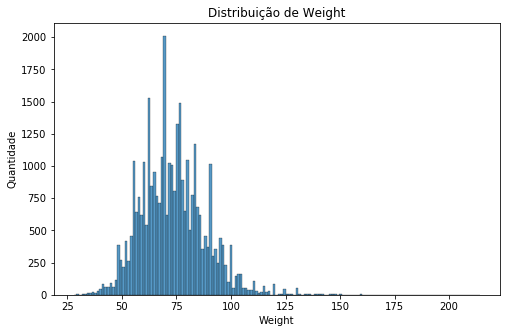

In [36]:
plt.figure(figsize=(8, 5))
height = sns.histplot(x=df['Weight'].dropna())
height.set(xlabel='Weight', ylabel='Quantidade')
height.set_title('Distribuição de Weight')
plt.show()

Como é possível notar acima, a distribuição de pesos na base apresenta um formato de distribuição normal. Logo, seria ideal substituir os valores faltantes não todos pela média, mas em um padrão de distribuição normal semelhante ao apresentado.

In [37]:
#contando o número de NaNs em Weight
is_nan_weight = df['Weight'].isna().sum()
print(is_nan_weight)

10954


In [38]:
#criando um array com valores em distribuição normal de acordo com a curva normal de Weight
dist_normal_weight = np.random.normal(loc=df['Weight'].mean(), scale=np.std(df['Weight']), size=is_nan_weight)

#substituindo os valores de NaN em Weight pelos valores gerados acima
df.loc[df['Weight'].isna(), 'Weight'] = dist_normal_weight

df.head(10)

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,4,Edgar Lindenau Aabye,MALE,34.0,NaN,71.590414,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,6,Per Knut Aaland,MALE,31.0,188.0,75.000000,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
2,15,Arvo Ossian Aaltonen,MALE,30.0,NaN,61.273029,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
3,15,Arvo Ossian Aaltonen,MALE,30.0,NaN,71.458612,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
4,16,Juhamatti Tapio Aaltonen,MALE,28.0,184.0,85.000000,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
5,17,Paavo Johannes Aaltonen,MALE,28.0,175.0,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
6,17,Paavo Johannes Aaltonen,MALE,28.0,175.0,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
7,17,Paavo Johannes Aaltonen,MALE,28.0,175.0,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
8,17,Paavo Johannes Aaltonen,MALE,28.0,175.0,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
9,17,Paavo Johannes Aaltonen,MALE,32.0,175.0,64.000000,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Team All-Around,Bronze


In [39]:
df.describe()

,Athlete_ID,Age,Height,Weight,Year
count,44627.000000,43665.000000,3.475800e+04,44627.000000,44627.000000
mean,69122.877227,25.866941,9.370726e+02,73.609221,1972.217985
std,38855.424012,5.963246,3.336878e+04,14.952461,94.192958
min,4.000000,10.000000,1.320000e+02,16.140606,-2992.000000
25%,36116.000000,22.000000,1.700000e+02,63.000000,1952.000000
50%,68634.000000,25.000000,1.780000e+02,73.000000,1984.000000
75%,103174.000000,29.000000,1.850000e+02,83.000000,2002.000000
max,135563.000000,73.000000,1.976779e+06,214.000000,2016.000000


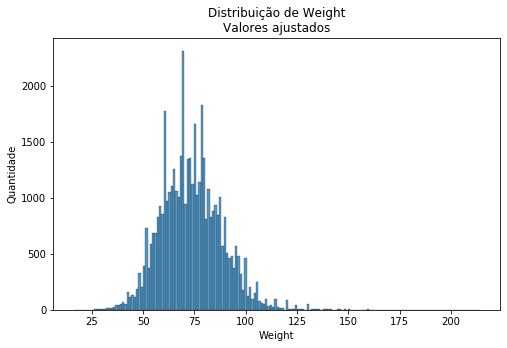

In [40]:
plt.figure(figsize=(8, 5))
height = sns.histplot(x=df['Weight'].dropna())
height.set(xlabel='Weight', ylabel='Quantidade')
height.set_title('Distribuição de Weight\nValores ajustados')
plt.show()

Com a coluna de `Weight` ajustada e tratada, vamos partir para a coluna de `Height` que apresenta problemas parecidos. Nessa coluna vamos usar outros plots para encontrar outliers e lidar com os problemas encontrados.

### Height

Analisando o `.describe()`, percebemos que em `Height` há valores imensos de máximo que estão fora do esperado e distorcendo o restante das informações. Usando um plot para destacar os outliers, será possível isolar os absurdos e filtrá-los. Ao decidir como lidar com eles, seja por exclusão ou substituição, o problema pode ser ajustado.

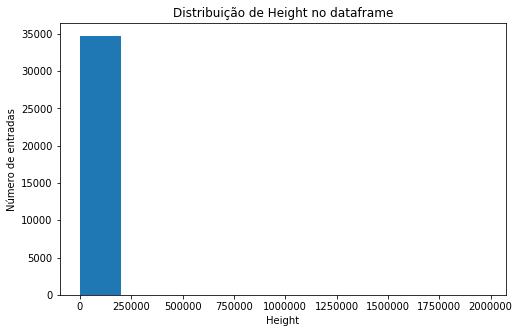

In [41]:
plt.figure(figsize=(8,5))
plt.hist(df['Height'].dropna())
plt.title('Distribuição de Height no dataframe')
plt.xlabel('Height')
plt.ylabel('Número de entradas')
plt.show()

Dado que, como é possível notar no plot acima, a relevância dos outliers é pífia, então é razoável definir um intervalo de valores esperados de altura de atletas e excluir os valores de fora do intervalo. No caso, o intervalo são entradas positivas até o valor `250`cm em altura.

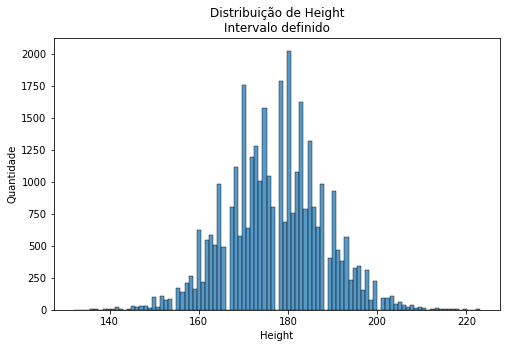

In [42]:
#excluindo valores de Height maiores que 250
indexAbsurd = df[df['Height'] > 250].index
df.drop(indexAbsurd, inplace=True)

plt.figure(figsize=(8, 5))
height = sns.histplot(x=df['Height'].dropna())
height.set(xlabel='Height', ylabel='Quantidade')
height.set_title('Distribuição de Height\nIntervalo definido')
plt.show()

Como é notável no gráfico acima, tendo filtrado os valores absurdos, a distribuição de alturas na base se comporta como uma curva normal, que é o esperado.

Para lidar com os valores de `NaN` na coluna `Height`, que são muitos, para não simplesmente substituí-los pela média, será feito como em `Weight`, substituindo os valores faltantes com valores gerados no padrão da curva normal de Height.

In [43]:
#contando o número de NaNs em Height
is_nan_height = df['Height'].isna().sum()
print(is_nan_height)

9869


In [44]:
#criando um array com valores em distribuição normal de acordo com a curva normal de Height
dist_normal_height = np.random.normal(loc=df['Height'].mean(), scale=np.std(df['Height']), size=is_nan_height)

#substituindo os valores de NaN em Weight pelos valores gerados acima
df.loc[df['Height'].isna(), 'Height'] = dist_normal_height

df.head(10)

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,4,Edgar Lindenau Aabye,MALE,34.0,176.569955,71.590414,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,6,Per Knut Aaland,MALE,31.0,188.000000,75.000000,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
2,15,Arvo Ossian Aaltonen,MALE,30.0,185.818909,61.273029,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
3,15,Arvo Ossian Aaltonen,MALE,30.0,168.126836,71.458612,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
4,16,Juhamatti Tapio Aaltonen,MALE,28.0,184.000000,85.000000,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
5,17,Paavo Johannes Aaltonen,MALE,28.0,175.000000,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
6,17,Paavo Johannes Aaltonen,MALE,28.0,175.000000,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
7,17,Paavo Johannes Aaltonen,MALE,28.0,175.000000,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
8,17,Paavo Johannes Aaltonen,MALE,28.0,175.000000,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
9,17,Paavo Johannes Aaltonen,MALE,32.0,175.000000,64.000000,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Team All-Around,Bronze


In [45]:
df.describe()

,Athlete_ID,Age,Height,Weight,Year
count,44604.000000,43642.000000,44604.000000,44604.000000,44604.000000
mean,69138.768093,25.867169,177.290859,73.609443,1972.209712
std,38848.038320,5.964099,10.884099,14.952991,94.215836
min,4.000000,10.000000,132.000000,16.140606,-2992.000000
25%,36144.000000,22.000000,170.000000,63.000000,1952.000000
50%,68647.000000,25.000000,177.665863,73.000000,1984.000000
75%,103182.000000,29.000000,185.000000,83.000000,2002.000000
max,135563.000000,73.000000,223.000000,214.000000,2016.000000


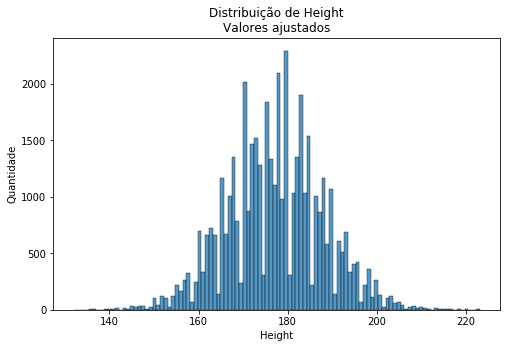

In [46]:
plt.figure(figsize=(8, 5))
height = sns.histplot(x=df['Height'].dropna())
height.set(xlabel='Height', ylabel='Quantidade')
height.set_title('Distribuição de Height\nValores ajustados')
plt.show()

Com os valores de `Height` ajustados e tratados, as colunas restantes a analisar e tratar são `Age` e `Year`. Começando por `Year`, iremos limpar as informações suspeitas da base.

### Year

Lendo as informações do `.describe()`, percebemos que o valor mínimo de entrada em `Year` é um valor negativo, `-2992`, o que é absurdo. Além disso, sabe-se que os jogos olímpicos modernos têm início em 1896, em Atenas e sua última edição é a de 2020 em Tokyo, que não está registrada na base, ou seja, a última edição registrada é de 2016, que é também o valor máximo, indicado no `.describe()`.

Assim, filtrando as entradas para serem apenas de valores dentro de um intervalo razoável, as informações corretas da base serão preservadas.

In [47]:
#excluindo valores fora do intervalo de datas em que jogos olímpicos ocorreram
df = df.query('1895<Year<2020')

df.describe()

,Athlete_ID,Age,Height,Weight,Year
count,44575.000000,43615.000000,44575.000000,44575.000000,44575.000000
mean,69158.507123,25.868050,177.289073,73.609222,1974.383489
std,38834.561519,5.964224,10.883616,14.953023,33.398368
min,4.000000,10.000000,132.000000,16.140606,1896.000000
25%,36167.000000,22.000000,170.000000,63.000000,1952.000000
50%,68658.000000,25.000000,177.655661,73.000000,1984.000000
75%,103190.000000,29.000000,185.000000,83.000000,2002.000000
max,135563.000000,73.000000,223.000000,214.000000,2016.000000


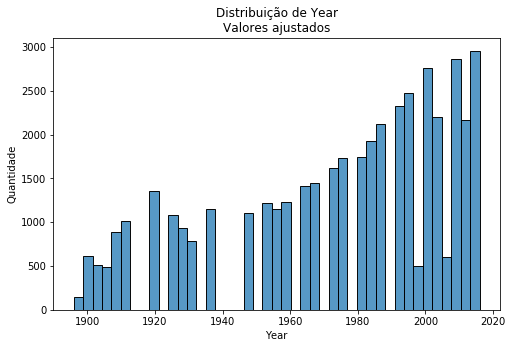

In [48]:
plt.figure(figsize=(8, 5))
year = sns.histplot(x=df['Year'])
year.set(xlabel='Year', ylabel='Quantidade')
year.set_title('Distribuição de Year\nValores ajustados')
plt.show()

Aqui vemos que todas as entrada estão dentro de datas em que ocorreram jogos olímpicos.

### Age

Em `Age`, há problemas de dados faltantes e idades suspeitas, os quais devem ser investigados e consertados, caso necessário.

Os valores de `min` e `max` de `Age` são suspeitos, porém, para confirmar se são verossímeis um bom método é fazer uma breve pesquisa externa. Se 10 é a idade mínima e 73 a idade máxima, é possível pesquisar se houve algum competidor tão jovem ou velho que já participou das olimpíadas nessas idades.

Surpreendentemente, sim, os competidores Dimitrios Loundras, 10 anos, e John Copley, 73 anos, são respectivamente os competidores mais jovem e velho a serem medalhistas nas olimpíadas. Por curiosidade, vamos investigar se estão registrados na base.

In [49]:
df[df['Age'] == 10]

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
23896,71691,Dimitrios Loundras,MALE,10.0,182.255729,58.188049,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze


In [50]:
df[df['Age'] == 73]

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
7061,22984,John (Herbert Crawford-) Copley (Williamson-),MALE,73.0,189.395193,91.915074,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Graphic Arts",Silver


De fato estão registrados!

Então devemos lidar com os dados faltantes, que podem simplesmente ser substituídos pela média das idades, uma vez que o volume de dados faltantes é pequeno.

In [51]:
#substituindo dados faltantes de Age pela idade média
df['Age'].replace(np.nan, df['Age'].mean(), inplace=True)

df.describe()

,Athlete_ID,Age,Height,Weight,Year
count,44575.000000,44575.000000,44575.000000,44575.000000,44575.000000
mean,69158.507123,25.868050,177.289073,73.609222,1974.383489
std,38834.561519,5.899648,10.883616,14.953023,33.398368
min,4.000000,10.000000,132.000000,16.140606,1896.000000
25%,36167.000000,22.000000,170.000000,63.000000,1952.000000
50%,68658.000000,25.000000,177.655661,73.000000,1984.000000
75%,103190.000000,28.000000,185.000000,83.000000,2002.000000
max,135563.000000,73.000000,223.000000,214.000000,2016.000000


In [52]:
df.head(10)

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,4,Edgar Lindenau Aabye,MALE,34.0,176.569955,71.590414,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,6,Per Knut Aaland,MALE,31.0,188.000000,75.000000,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
2,15,Arvo Ossian Aaltonen,MALE,30.0,185.818909,61.273029,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
3,15,Arvo Ossian Aaltonen,MALE,30.0,168.126836,71.458612,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
4,16,Juhamatti Tapio Aaltonen,MALE,28.0,184.000000,85.000000,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
5,17,Paavo Johannes Aaltonen,MALE,28.0,175.000000,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
6,17,Paavo Johannes Aaltonen,MALE,28.0,175.000000,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
7,17,Paavo Johannes Aaltonen,MALE,28.0,175.000000,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
8,17,Paavo Johannes Aaltonen,MALE,28.0,175.000000,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
9,17,Paavo Johannes Aaltonen,MALE,32.0,175.000000,64.000000,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Team All-Around,Bronze


Agora a limpeza dos dados está finalizada e podemos partir para a análise e visualização dos dados!

## Análise e visualização dos dados

A análise dos dados das olimpíadas que tentarei trazer insights a respeito são sobre os seguintes temas:
1. Perfil de atleta:
     - o perfil médio de um atleta medalhista nas olimpíadas;
     - o perfil de um atleta vencedor de provas (medalhista de ouro);
     - distinções entre perfis masculinos e femininos;
     - diferenças de perfil entre esportes distintos;
2. Dados históricos:
     - distinções entre as olimpíadas de verão e inverno;
     - países mais prolíficos em vitórias nas olimpíadas;
     - influência de data nos dados olímpicos;
     - evolução da representatividade feminina nas olimpíadas;
3. Curiosidades - maiores atletas da história das olimpíadas:    
     - maiores campeões da história das olimpíadas;

Com diferentes visualizações e motivações que podem surgir durante a análise, informações e insights serão extraídos que trarão novas perspectivas sobre o que envolve ser um medalhista olímpico, historicamente.

### Perfil de atleta olímpico

In [53]:
#criando uma lista de atletas que ganharam medalhas
medal_winner = df[df['Medal'].isnull() == False]

#criando uma lista de atletas que ganharam medalhas de ouro
gold_medal_winner = df[df['Medal'] == 'Gold']

In [54]:
#criando uma lista com os países com mais medalhas em ordem decrescente
medals_by_country = medal_winner.groupby('NOC').count().sort_values('Medal', ascending=False).reset_index()
top_country_medals = medals_by_country[['Medal', 'NOC']][:10]

#criando uma lista com os países com mais medalhas de ouro em ordem decrescente
gold_medals_by_country = gold_medal_winner.groupby('NOC').count().sort_values('Medal', ascending=False).reset_index()
top_country_gold_medals = gold_medals_by_country[['Medal', 'NOC']][:10]

Começando então pela análise do perfil de um vencedor de medalhas olímpico, buscaremos definir qual idade, peso, altura e de que país é o atleta medalhista.

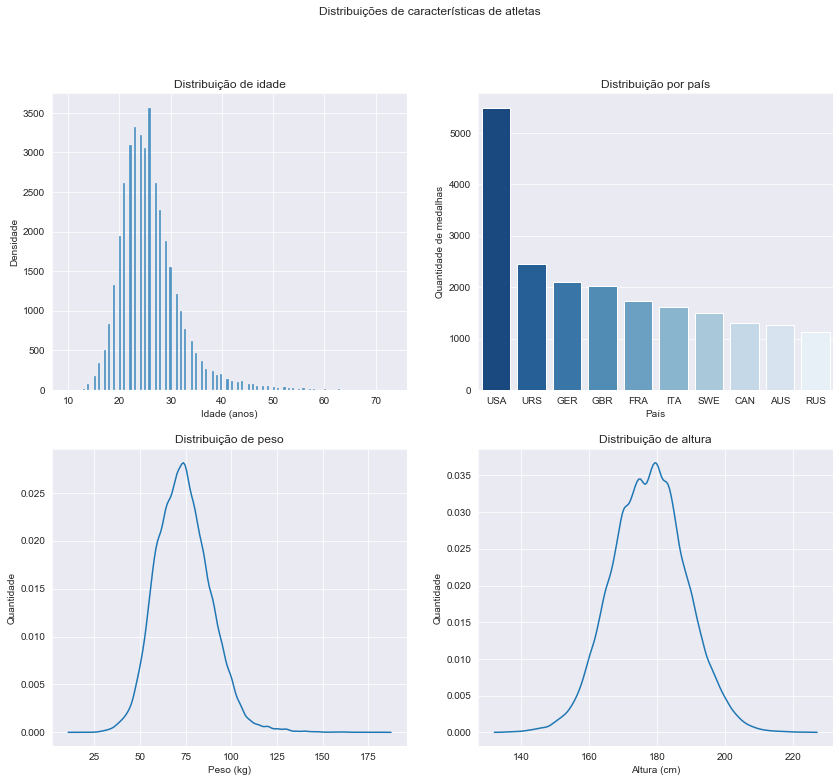

In [77]:
#Distribuições de características distintas de atletas medalhistas
f, axs = plt.subplots(2, 2, figsize = (14, 12))
sns.set_style('darkgrid')
sns.set_palette(palette='tab10')
f.suptitle('Distribuições de características de atletas')

#parâmetros gráfico idade
sns.histplot(ax=axs[0][0], data=medal_winner['Age'])
axs[0][0].set(xlabel='Idade (anos)', ylabel='Densidade')
axs[0][0].set_title('Distribuição de idade')

#parâmetros gráfico país
sns.barplot(ax=axs[0][1], data=top_country_medals, x='NOC', y='Medal', palette='Blues_r')
axs[0][1].set(xlabel='País', ylabel='Quantidade de medalhas')
axs[0][1].set_title('Distribuição por país')

#parâmetros gráfico peso
sns.kdeplot(ax=axs[1][0], data=medal_winner['Weight'])
axs[1][0].set(xlabel='Peso (kg)', ylabel='Quantidade')
axs[1][0].set_title('Distribuição de peso')

#parâmetros gráfico peso
sns.kdeplot(ax=axs[1][1], data=medal_winner['Height'])
axs[1][1].set(xlabel='Altura (cm)', ylabel='Quantidade')
axs[1][1].set_title('Distribuição de altura')

plt.show()

Analisando os gráficos acima, é possível delinear um certo perfil médio de um atleta vencedor de medalhas nas olimpíadas: sua idade está entre os 24 e 26 anos de idade, seu peso está ao redor dos 75 kg, sua altura é aproximadamente 180 cm e seu país de origem é os EUA.

Como será, então, que é o perfil de atletas vencedores de medalhas de ouro? Será muito distinto do perfil acima?

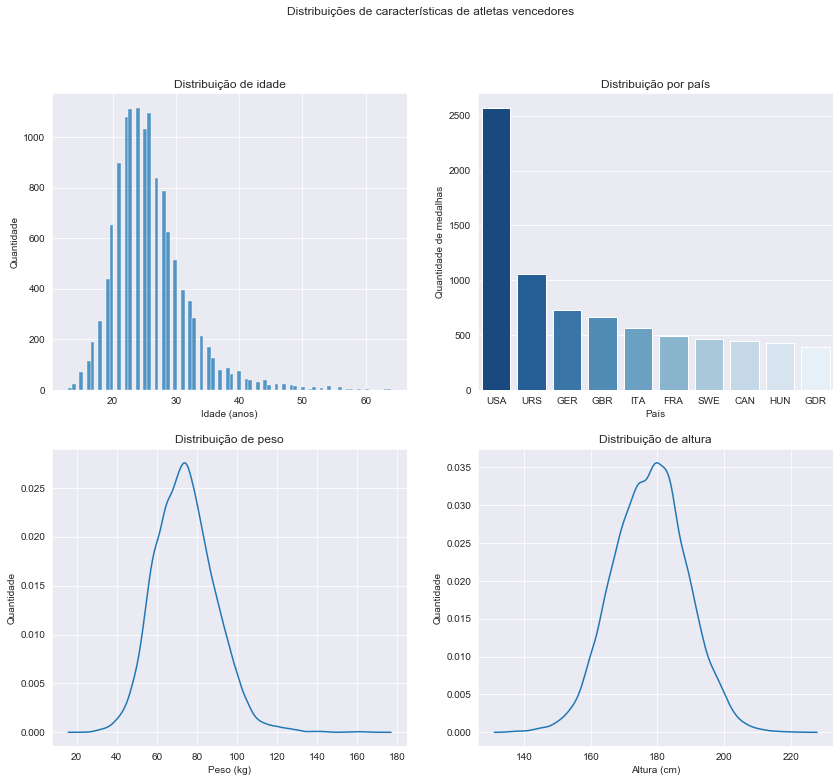

In [56]:
#Distribuições de características distintas de atletas medalhistas
f, axs = plt.subplots(2, 2, figsize = (14, 12))
f.suptitle('Distribuições de características de atletas vencedores')

#parâmetros gráfico idade
sns.histplot(ax=axs[0][0], data=gold_medal_winner['Age'])
axs[0][0].set(xlabel='Idade (anos)', ylabel='Quantidade')
axs[0][0].set_title('Distribuição de idade')

#parâmetros gráfico país
sns.barplot(ax=axs[0][1], data=top_country_gold_medals, x='NOC', y='Medal', palette='Blues_r')
axs[0][1].set(xlabel='País', ylabel='Quantidade de medalhas')
axs[0][1].set_title('Distribuição por país')

#parâmetros gráfico peso
sns.kdeplot(ax=axs[1][0], data=gold_medal_winner['Weight'])
axs[1][0].set(xlabel='Peso (kg)', ylabel='Quantidade')
axs[1][0].set_title('Distribuição de peso')

#parâmetros gráfico peso
sns.kdeplot(ax=axs[1][1], data=gold_medal_winner['Height'])
axs[1][1].set(xlabel='Altura (cm)', ylabel='Quantidade')
axs[1][1].set_title('Distribuição de altura')

plt.show()

Com os gráficos apenas para a análise de atletas campeões, temos ainda um perfil muito semelhantes ao anterior: idade entre 22 e 26 anos de idade, peso entre 70-75 kg, altura próxima dos 180 cm e os EUA como país de origem.

Agora, como será que se dão as diferenças entre perfis de atletas do sexo masculino x sexo feminino?

In [57]:
#criando lista de atletas do sexo masculino que ganharam medalhas
m_medal_winner = medal_winner[medal_winner['Sex'] == 'MALE']

#criando uma lista com os países com mais medalhas do sexo masculino em ordem decrescente
m_medals_by_country = m_medal_winner.groupby('NOC').count().sort_values('Medal', ascending=False).reset_index()
top_country_m_medals = m_medals_by_country[['Medal', 'NOC']][:10]

#criando lista de atletas do sexo feminino que ganharam medalhas
f_medal_winner = medal_winner[medal_winner['Sex'] == 'FEMALE']

#criando uma lista com os países com mais medalhas do sexo feminino em ordem decrescente
f_medals_by_country = f_medal_winner.groupby('NOC').count().sort_values('Medal', ascending=False).reset_index()
top_country_f_medals = f_medals_by_country[['Medal', 'NOC']][:10]

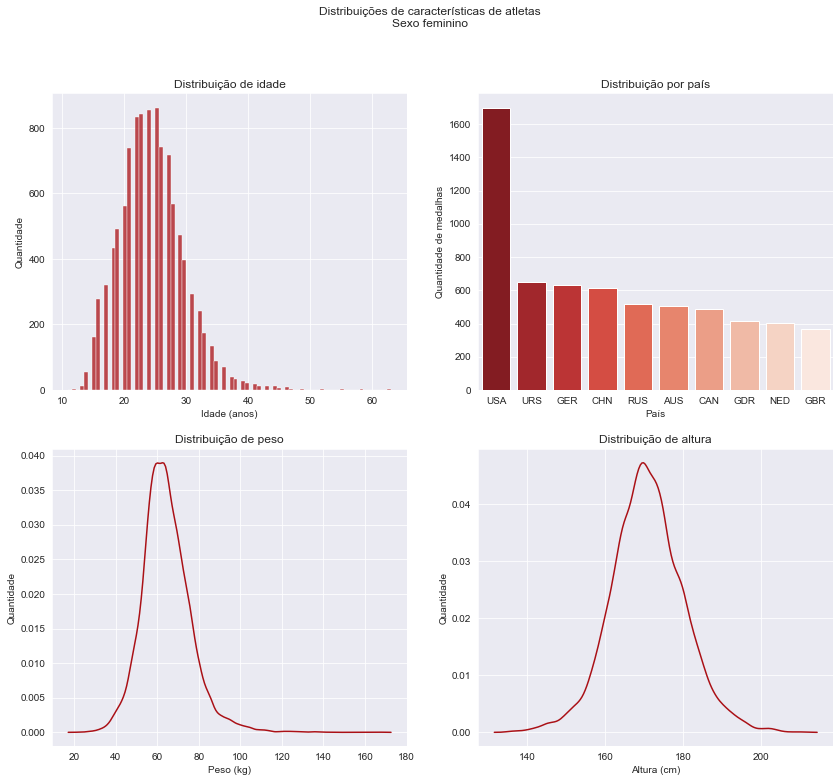

In [79]:
#Distribuições de características distintas de atletas medalhistas
f, axs = plt.subplots(2, 2, figsize = (14, 12))
sns.set_palette(palette='Reds_r')
f.suptitle('Distribuições de características de atletas\nSexo feminino')

#parâmetros gráfico idade
sns.histplot(ax=axs[0][0], data=f_medal_winner['Age'])
axs[0][0].set(xlabel='Idade (anos)', ylabel='Quantidade')
axs[0][0].set_title('Distribuição de idade')

#parâmetros gráfico país
sns.barplot(ax=axs[0][1], data=top_country_f_medals, x='NOC', y='Medal', palette='Reds_r')
axs[0][1].set(xlabel='País', ylabel='Quantidade de medalhas')
axs[0][1].set_title('Distribuição por país')

#parâmetros gráfico peso
sns.kdeplot(ax=axs[1][0], data=f_medal_winner['Weight'])
axs[1][0].set(xlabel='Peso (kg)', ylabel='Quantidade')
axs[1][0].set_title('Distribuição de peso')

#parâmetros gráfico peso
sns.kdeplot(ax=axs[1][1], data=f_medal_winner['Height'])
axs[1][1].set(xlabel='Altura (cm)', ylabel='Quantidade')
axs[1][1].set_title('Distribuição de altura')

plt.show()

Investigando as características acima, o perfil de uma medalhista nas olimpíadas historicamente é de mulheres entre 22 e 26 anos de idade, peso em torno dos 60 kg, altura próxima de 172 cm e país de origem nos EUA. 

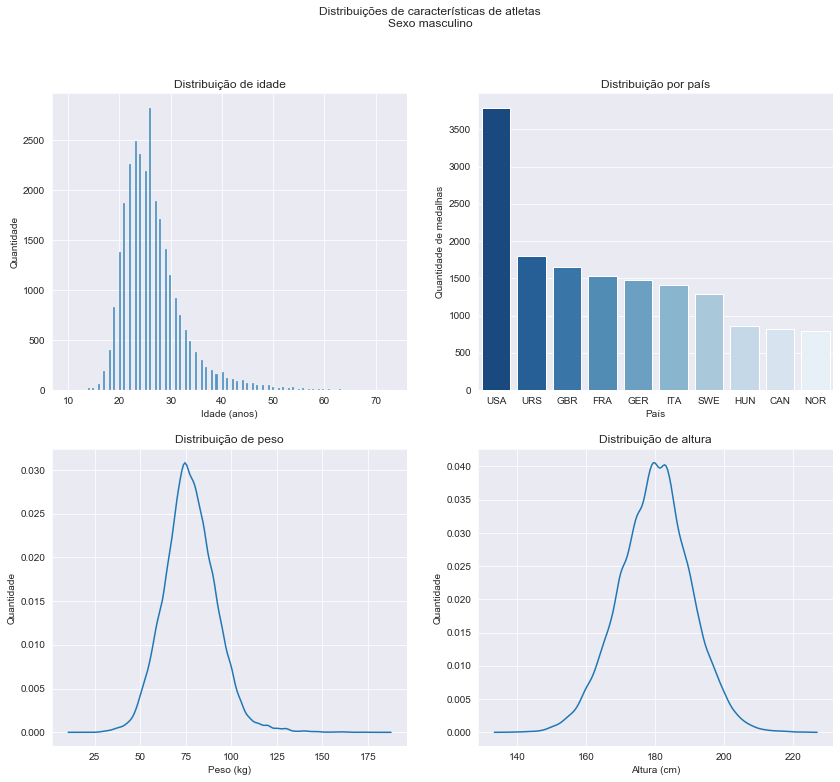

In [81]:
#Distribuições de características distintas de atletas medalhistas
f, axs = plt.subplots(2, 2, figsize = (14, 12))
sns.set_palette(palette='tab10')
f.suptitle('Distribuições de características de atletas\nSexo masculino')

#parâmetros gráfico idade
sns.histplot(ax=axs[0][0], data=m_medal_winner['Age'])
axs[0][0].set(xlabel='Idade (anos)', ylabel='Quantidade')
axs[0][0].set_title('Distribuição de idade')

#parâmetros gráfico país
sns.barplot(ax=axs[0][1], data=top_country_m_medals, x='NOC', y='Medal', palette='Blues_r')
axs[0][1].set(xlabel='País', ylabel='Quantidade de medalhas')
axs[0][1].set_title('Distribuição por país')

#parâmetros gráfico peso
sns.kdeplot(ax=axs[1][0], data=m_medal_winner['Weight'])
axs[1][0].set(xlabel='Peso (kg)', ylabel='Quantidade')
axs[1][0].set_title('Distribuição de peso')

#parâmetros gráfico peso
sns.kdeplot(ax=axs[1][1], data=m_medal_winner['Height'])
axs[1][1].set(xlabel='Altura (cm)', ylabel='Quantidade')
axs[1][1].set_title('Distribuição de altura')

plt.show()

Já nas características de medalhistas homens, observa-se que tendem a ter a mesma faixa de idade que as mulheres, entre 22 e 26 anos, uma faixa de peso entre 75 e 80 kg, 15 kg acima da faixa de peso média das mulheres, altura em torno de 180 cm, 8 cm acima da média feminina e país de origem também no EUA.

Agora, o "perfil médio" de um atleta olímpico pode ser um enfoque desleal, uma vez que diferentes modalidades esportivas favorecem diferentes biotipos e esportes diversos podem mostrar isso em seus perfis. Com isso em vista, vamos analisar duas modalidades esportivas bastante distintas para ver se conseguimos extrair informações diferentes sobre o perfil de atletas desses esportes.

In [60]:
print("Sport column unique values:")
sports = df.Sport.unique()
print(sports)

Sport column unique values:
['Tug-Of-War' 'Cross Country Skiing' 'Swimming' 'Ice Hockey' 'Gymnastics'
 'Alpine Skiing' 'Handball' 'Speed Skating' 'Sailing' 'Cycling' 'Rowing'
 'Fencing' 'Taekwondo' 'Athletics' 'Canoeing' 'Football' 'Water Polo'
 'Wrestling' 'Modern Pentathlon' 'Hockey' 'Figure Skating' 'Golf'
 'Softball' 'Volleyball' 'Boxing' 'Basketball' 'Diving' 'Shooting'
 'Freestyle Skiing' 'Baseball' 'Nordic Combined' 'Bobsleigh'
 'Equestrianism' 'Curling' 'Judo' 'Tennis' 'Badminton' 'Rugby Sevens'
 'Rhythmic Gymnastics' 'Weightlifting' 'Beach Volleyball' 'Ski Jumping'
 'Rugby' 'Short Track Speed Skating' 'Archery' 'Biathlon' 'Lacrosse'
 'Synchronized Swimming' 'Triathlon' 'Polo' 'Luge' 'Table Tennis'
 'Art Competitions' 'Snowboarding' 'Cricket' 'Skeleton' 'Racquets'
 'Military Ski Patrol' 'Croquet' 'Roque' 'Alpinism' 'Trampolining'
 'Basque Pelota' 'Motorboating' 'Jeu De Paume' 'Aeronautics']


Dois esportes da base de dados em que é possível imaginar perfis de atletas muito diferentes são das modalidades de levantamento de peso (`Weightlifting`) e de basquetebol (`Basketball`). Vamos plotar os gráficos referentes aos perfis de atletas medalhistas dessas modalidades e verificar se essa hipótese se confirma.

In [61]:
#criando lista de atletas de levantamento de peso que ganharam medalhas
wl_medal_winner = medal_winner[medal_winner['Sport'] == 'Weightlifting']

#criando uma lista com os países com mais medalhas de levantamento de peso em ordem decrescente
wl_medals_by_country = wl_medal_winner.groupby('NOC').count().sort_values('Medal', ascending=False).reset_index()
top_country_wl_medals = wl_medals_by_country[['Medal', 'NOC']][:10]

#criando lista de atletas de basquete que ganharam medalhas
bk_medal_winner = medal_winner[medal_winner['Sport'] == 'Basketball']

#criando uma lista com os países com mais medalhas de ginástica olímpica em ordem decrescente
bk_medals_by_country = bk_medal_winner.groupby('NOC').count().sort_values('Medal', ascending=False).reset_index()
top_country_bk_medals = bk_medals_by_country[['Medal', 'NOC']][:10]

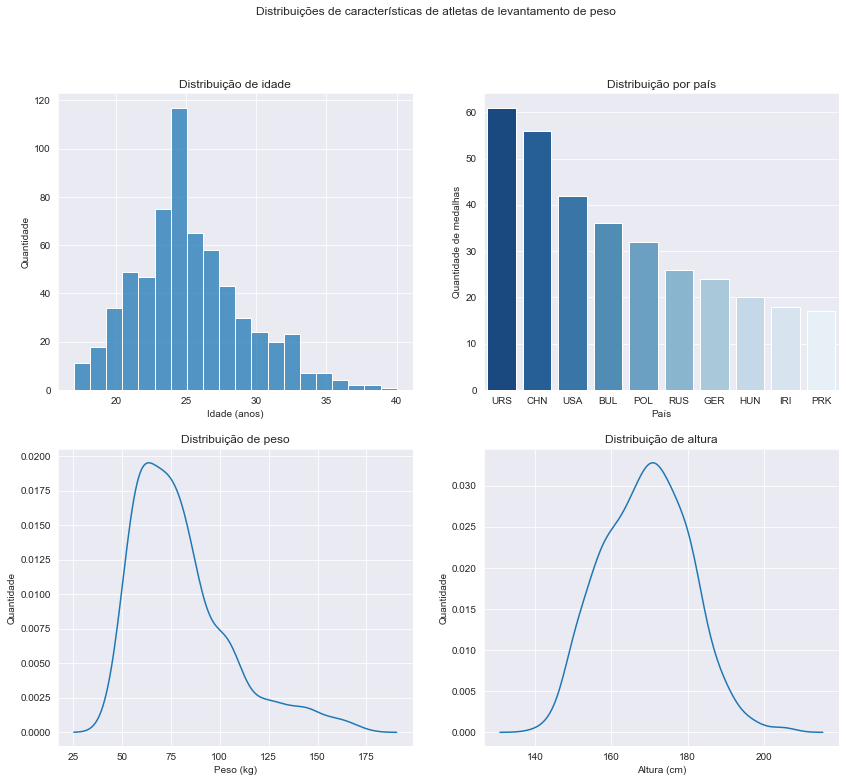

In [62]:
#Distribuições de características distintas de atletas de levantamento de peso medalhistas
f, axs = plt.subplots(2, 2, figsize = (14, 12))
f.suptitle('Distribuições de características de atletas de levantamento de peso')

#parâmetros gráfico idade
sns.histplot(ax=axs[0][0], data=wl_medal_winner['Age'])
axs[0][0].set(xlabel='Idade (anos)', ylabel='Quantidade')
axs[0][0].set_title('Distribuição de idade')

#parâmetros gráfico país
sns.barplot(ax=axs[0][1], data=top_country_wl_medals, x='NOC', y='Medal', palette='Blues_r')
axs[0][1].set(xlabel='País', ylabel='Quantidade de medalhas')
axs[0][1].set_title('Distribuição por país')

#parâmetros gráfico peso
sns.kdeplot(ax=axs[1][0], data=wl_medal_winner['Weight'])
axs[1][0].set(xlabel='Peso (kg)', ylabel='Quantidade')
axs[1][0].set_title('Distribuição de peso')

#parâmetros gráfico peso
sns.kdeplot(ax=axs[1][1], data=wl_medal_winner['Height'])
axs[1][1].set(xlabel='Altura (cm)', ylabel='Quantidade')
axs[1][1].set_title('Distribuição de altura')

plt.show()

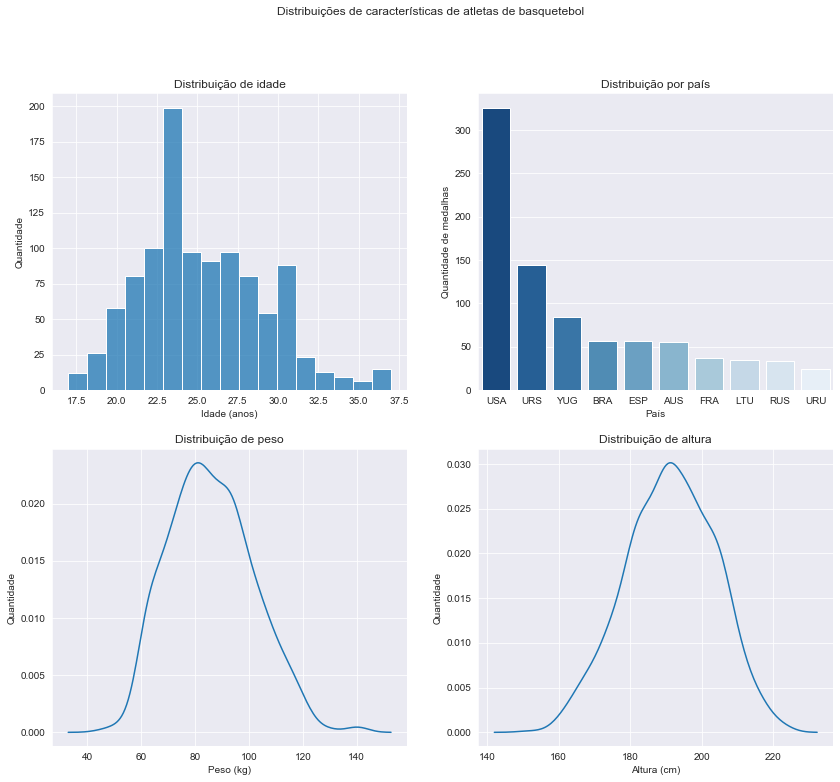

In [63]:
#Distribuições de características distintas de atletas de basquete medalhistas
f, axs = plt.subplots(2, 2, figsize = (14, 12))
f.suptitle('Distribuições de características de atletas de basquetebol')

#parâmetros gráfico idade
sns.histplot(ax=axs[0][0], data=bk_medal_winner['Age'])
axs[0][0].set(xlabel='Idade (anos)', ylabel='Quantidade')
axs[0][0].set_title('Distribuição de idade')

#parâmetros gráfico país
sns.barplot(ax=axs[0][1], data=top_country_bk_medals, x='NOC', y='Medal', palette='Blues_r')
axs[0][1].set(xlabel='País', ylabel='Quantidade de medalhas')
axs[0][1].set_title('Distribuição por país')

#parâmetros gráfico peso
sns.kdeplot(ax=axs[1][0], data=bk_medal_winner['Weight'])
axs[1][0].set(xlabel='Peso (kg)', ylabel='Quantidade')
axs[1][0].set_title('Distribuição de peso')

#parâmetros gráfico peso
sns.kdeplot(ax=axs[1][1], data=bk_medal_winner['Height'])
axs[1][1].set(xlabel='Altura (cm)', ylabel='Quantidade')
axs[1][1].set_title('Distribuição de altura')

plt.show()

Como esperado, os perfis de cada modalidade escolhida são muito distintos: enquanto em levantamento de peso, historicamente o atleta médio tem 25 anos de idade, 60 kg, 170 cm de altura e seu país de origem é ou a antiga União Soviética ou a China, o atleta médio jogador de basquete tem 23 anos de idade, aproximadamente 80 kg de peso, altura de 190 cm e origem nos EUA. É possível imaginar que outros esportes apresentem ainda outras características específicas para seus esportes.

Dado que é notável que, via de regra, as idades de atletas medalhistas se mantém parecidas mas que os pesos e alturas variam mais conforme os esportes, vamos fazer uma comparação lado a lado entre certos esportes de concentração de peso e altura para cada um.

In [64]:
#lista dos 5 países mais influentes do século XX e XXI
sports_selection = ['Basketball', 'Weightlifting', 'Athletics', 'Gymnastics', 'Volleyball', 'Taekwondo']

#filtrando a base de ganhadores de medalha para selecionar os países da lista
sports = medal_winner[medal_winner['Sport'].isin(sports_selection)]

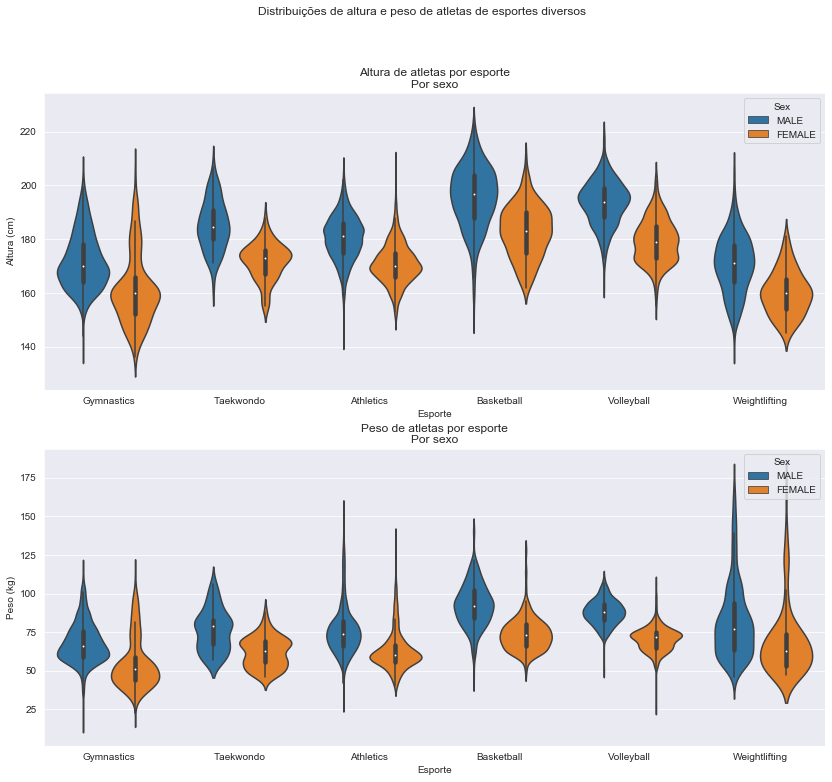

In [65]:
f, axs = plt.subplots(2, 1, figsize = (14, 12))
f.suptitle('Distribuições de altura e peso de atletas de esportes diversos')

#parâmetros gráfico de altura
sns.violinplot(ax=axs[0], x='Sport', y='Height', hue='Sex', data=sports)
axs[0].set(xlabel='Esporte', ylabel='Altura (cm)')
axs[0].set_title('Altura de atletas por esporte\nPor sexo')

#parâmetros gráfico de peso
sns.violinplot(ax=axs[1], x='Sport', y='Weight', hue='Sex', data=sports)
axs[1].set(xlabel='Esporte', ylabel='Peso (kg)')
axs[1].set_title('Peso de atletas por esporte\nPor sexo')
plt.show()

É notável ao longo das análises que há um certo padrão na idade de medalhistas olímpicos, mas seus pesos e alturas variam conforme as distinções de sexo e esporte. Será que é possível delinear uma correlação altura x peso? Usando um scatterplot com essas features e uma linha de tendência, podemos verificar essa hipótese.

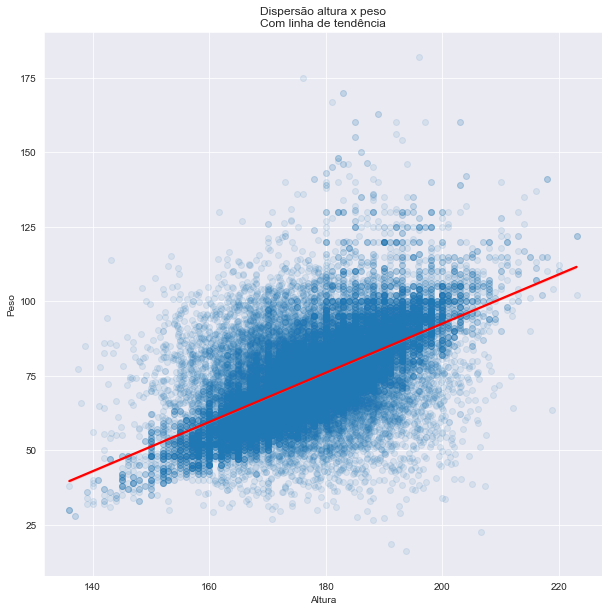

In [66]:
plt.figure(figsize=(10, 10))
sns.regplot(x='Height', y='Weight', data=medal_winner, scatter_kws={'alpha':0.1}, line_kws={'color':'r'})
plt.title('Dispersão altura x peso\nCom linha de tendência')
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.show()

O gráfico mostra que há uma correlação positiva significativa entre peso e altura, o que explica as variações de certa forma proporcionais entre altura e peso conforme os diferentes meios, como modalidades e sexo.

### Dados históricos

Agora para uma análise dos dados históricos sobre as olimpíadas, iremos investigar diferentes informações ao longo dos anos desde o início das olimpíadas modernas, em 1896. Informações como: os países mais vitoriosos ao longo dos anos, o desenvolvimento das olimpíadas, a evolução das características de participantes, além de outras descobertas que podem ocorrer no caminho.

In [82]:
#filtrando a base para dados da temporada de verão
summer_df = df[df['Season'] == 'Summer']

#filtrando apenas atletas premiados com medalhas
mw_summer_df = summer_df[summer_df['Medal'].isnull() == False]

#filtrando apenas atletas premiados com medalhas de ouro
gmw_summer_df = summer_df[summer_df['Medal'] == 'Gold']

#filtrando a base para dados da temporada de inverno
winter_df = df[df['Season'] == 'Winter']

#filtrando apenas atletas premiados com medalhas
mw_winter_df = winter_df[winter_df['Medal'].isnull() == False]

#filtrando apenas atletas premiados com medalhas de ouro
gmw_winter_df = winter_df[winter_df['Medal'] == 'Gold']

#selecionando informações sobre medalhas por ano em cada temporada
hist_medal_count = summer_df.groupby('Year').count().reset_index()

hist_medal_count_winter = winter_df.groupby('Year').count().reset_index()

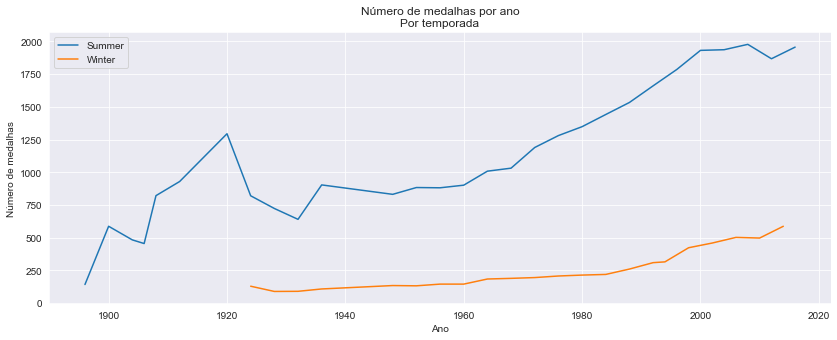

In [68]:
#Medalhas por ano e temporada desde o início das olimpíadas
plt.figure(figsize = (14, 5))
sns.lineplot(data=hist_medal_count, x='Year', y='Medal')
sns.lineplot(data=hist_medal_count_winter, x='Year', y='Medal')
plt.legend(['Summer', 'Winter'])
plt.title('Número de medalhas por ano\nPor temporada')
plt.xlabel('Ano')
plt.ylabel('Número de medalhas')
plt.show()

Com o gráfico acima, podemos ver a evolução dos jogos ao longo dos anos. A dimensão das olimpíadas de verão cresceu em aproximadamente 10 vezes desde sua criação e é possível ver que os jogos olímpicos de inverno foram introduzidos posteriormente, em 1924, e eles também cresceram em número de atletas competindo e eventos, uma vez que seu número de medalhas aumentou ao longo dos anos.

Seria interessante trazer um enfoque histórico em determinados países ao longo dos anos nas olimpíadas de verão. Nas últimas edições, os EUA, a Grã-Bretanha, a China, a Rússia e a Alemanha têm sido países em destaque recorrente, além de serem países com muito impacto histórico e poder hegemônico no século XX e XXI. Como será que se desenvolveu o desempenho desses países desde o início das olimpíadas?

In [69]:
#lista dos 5 países mais influentes do século XX e XXI
big5 = ['USA', 'GBR', 'CHN', 'RUS', 'GER']

#filtrando a base de ganhadores de medalha para selecionar os países da lista
big5_summer_df = mw_summer_df[mw_summer_df['NOC'].isin(big5)]

#filtrando a base de ganhadores de medalha de ouro para selecionar os países da lista
big5_gold_summer_df = gmw_summer_df[gmw_summer_df['NOC'].isin(big5)]

#selecionando informações sobre medalhas por ano nos países mencionados em temporadas de verão
big5_hist_medal_count = big5_summer_df.groupby(['Year', 'NOC']).count().reset_index()

#selecionando informações sobre medalhas de ouro por ano nos países mencionados em temporadas de verão
big5_hist_gold_medal_count = big5_gold_summer_df.groupby(['Year', 'NOC']).count().reset_index()

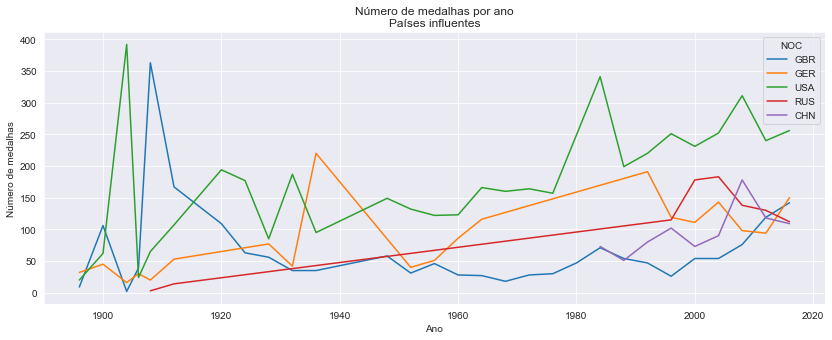

In [70]:
#Medalhas por ano e país desde o início das olimpíadas
plt.figure(figsize = (14, 5))
sns.lineplot(data=big5_hist_medal_count, x='Year', y='Medal', hue='NOC')
plt.title('Número de medalhas por ano\nPaíses influentes')
plt.xlabel('Ano')
plt.ylabel('Número de medalhas')
plt.show()

Acima vemos um gráfico que contém muitas informações interessantes: dos 5 países, apenas três participaram das primeiras edições das olimpíadas, os EUA, a Grã-Bretanha e a Alemanha; a linha vermelha, que representa a Rússia, tem uma reta bastante longa desde aproximadamente 1912 até 1996 - isso será melhor investigado a seguir; a China tem o início de sua linha apenas após 1980 e, depois de alguns anos, toma uma posição de grande relevância, atingindo, inclusive, a segunda colocação em quantidade de medalhas em 2008; nos EUA, na Alemanha e na Grã-Bretanha também é notável que em certas datas, há retas maiores, como no período entre 1914 e 1920 e após 1940 até 1948, além de na Alemanha haver um patamar maior entre 1964 e 1992.

Correlacionando essas informações com eventos históricos como as Grandes Guerras Mundiais, esses dados ganham novo sentido: a Rússia, por muito tempo ao longo do século XX, era a União Soviética; os EUA, Grã-Bretanha e Alemanha não competiram em olimpíadas no período das Guerras Mundiais e a China se tornou um país mais influente apenas recentemente, hoje em dia estando entre os 2 países de maior economia no mundo lado a lado com os EUA, explicando sua aparição recente no gráfico acima.

Antes de analisar as informações sobre a Rússia e a União Soviética, vamos ver como fica o quadro acima, mas apenas para medalhas de ouro nas olimpíadas de verão.

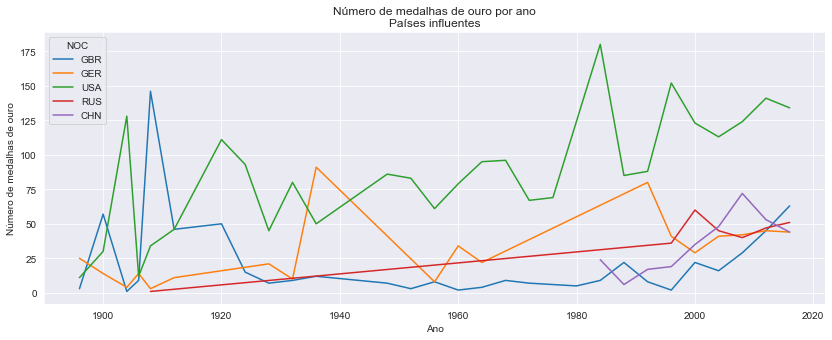

In [71]:
#Medalhas de ouro por ano e país desde o início das olimpíadas
plt.figure(figsize = (14, 5))
sns.lineplot(data=big5_hist_gold_medal_count, x='Year', y='Medal', hue='NOC')
plt.title('Número de medalhas de ouro por ano\nPaíses influentes')
plt.xlabel('Ano')
plt.ylabel('Número de medalhas de ouro')
plt.show()

O gráfico de medalhas de ouro tem um comportamento bastante semelhante ao anterior ao longo dos anos.

Agora para o plot do gráfico com informações da Rússia e União Soviética em relação aos EUA:

In [72]:
#lista com Rússia e União soviética
russia = ['RUS', 'URS', 'USA']

#filtrando a base de ganhadores de medalha para selecionar os países da lista
russia_summer_df = mw_summer_df[mw_summer_df['NOC'].isin(russia)]

#selecionando informações sobre medalhas por ano nos países da lista em temporadas de verão
russia_hist_medal_count = russia_summer_df.groupby(['Year', 'NOC']).count().reset_index()

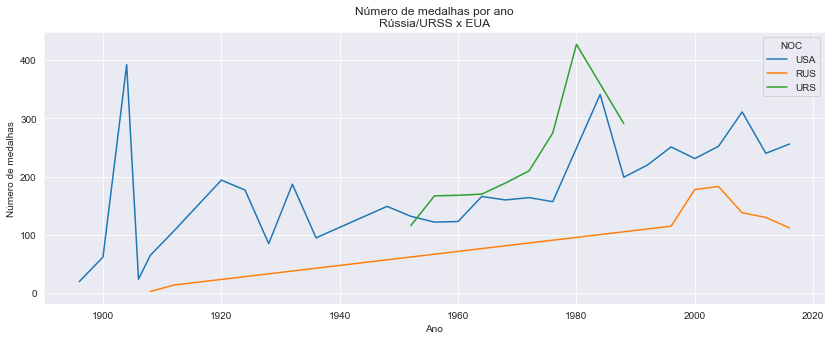

In [73]:
#Medalhas por ano e país desde o início das olimpíadas
plt.figure(figsize = (14, 5))
sns.lineplot(data=russia_hist_medal_count, x='Year', y='Medal', hue='NOC')
plt.title('Número de medalhas por ano\nRússia/URSS x EUA')
plt.xlabel('Ano')
plt.ylabel('Número de medalhas')
plt.show()

Com o gráfico acima, vemos que no período entre 1920 e 1948, a Rússia (seja como Rússia ou União Soviética) não participou das olimpíadas. A partir de 1952, a União Soviética passa a participar das olimpíadas e traz resultados imensos até o fim da União Soviética, superando os EUA em todos os anos exceto seu primeiro, em 1952. Essa competição está relacionada à Guerra Fria, iniciada após a Segunda Guerra Mundial, em que os EUA e União Soviética batalhavam em todos os âmbitos pela hegemonia mundial, e os esportes, representados pelas olimpíadas, eram um meio de demonstrar a superioridade entre esses países.

Mesmo após o fim da União Soviética, a Rússia continuou sendo um país forte nas olimpíadas até o escândalo de doping de 2017, mas os dados da base em questão contém dados apenas até 2016.

Aproveitando os dados históricos, como será que foi a evolução da representatividade feminina nos jogos olímpicos?

In [74]:
#selecionando informações sobre medalhas por ano com distinção de ano e sexo
hist_mw_summer_df = mw_summer_df.groupby(['Year', 'Sex']).count().reset_index()

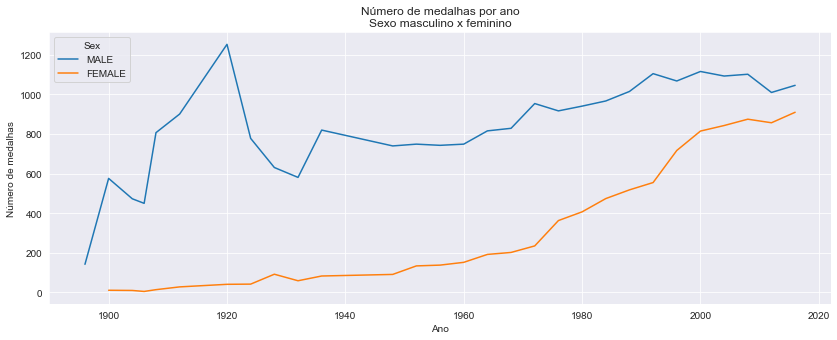

In [75]:
#Medalhas por ano e sexo desde o início das olimpíadas
plt.figure(figsize = (14, 5))
sns.set_palette(palette='tab10')
sns.lineplot(data=hist_mw_summer_df, x='Year', y='Medal', hue='Sex')
plt.title('Número de medalhas por ano\nSexo masculino x feminino')
plt.xlabel('Ano')
plt.ylabel('Número de medalhas')
plt.show()

O gráfico acima mostra como a representatividade feminina nas olimpíadas teve um crescimento um tanto quanto tardio, acelerando apenas a partir de 1972. Nas edições mais recentes, o vão entre o número de atletas de cada sexo diminuiu bastante, estando a uma diferença inferior a 200 medalhas, entretanto ainda não há igual representatividade de sexo nas olimpíadas.

### Curiosidades - maiores medalhistas da história

Na base de dados, está não apenas a coluna de esportes, mas também a coluna de eventos. Não só isso, como temos todos os anos em que as olimpíadas modernas ocorreram até 2016. Dito isso, é de se imaginar que existem atletas com mais do que uma aparição no dataframe. Podemos selecionar da base os maiores campeões da história das olimpíadas.

In [83]:
#criando uma lista com os atletas com mais medalhas de ouro em ordem decrescente
gold_medals_by_athlete = gold_medal_winner.groupby('Name').count().sort_values('Medal', ascending=False).reset_index()
top_athlete_gold_medals = gold_medals_by_athlete[['Name', 'Medal']][:15]

top_athlete_gold_medals

,Name,Medal
0,"Michael Fred Phelps, II",22
1,"Raymond Clarence ""Ray"" Ewry",10
2,Mark Andrew Spitz,9
3,Larysa Semenivna Latynina (Diriy-),9
4,"Frederick Carlton ""Carl"" Lewis",9
5,Paavo Johannes Nurmi,9
6,"Matthew Nicholas ""Matt"" Biondi",8
7,Sawao Kato,8
8,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",8
9,Birgit Fischer-Schmidt,8


Acima estão os 15 maiores medalhistas da história das olimpíadas! Em destaque, estão certos nomes possivelmente familiares por serem campeões recentes, como Michael Phelps e Usain Bolt.

Michael Fred Phelps, II não apenas é o maior campeão da história das olimpíadas mas o é por uma distância imensa: suas 22 medalhas de ouro são mais do que o dobro das 10 medalhas do segundo colocado, Raymond Clarence "Ray" Ewry!

A maior campeã da história dos jogos é a ginasta soviética Larysa Semenivna Latynina, com 9 medalhas de ouro, maior número de vitórias no esporte, tanto para homens quanto para mulheres.

In [86]:
#criando uma lista com os atletas de inverno com mais medalhas de ouro em ordem decrescente
gold_medals_winter_athlete = gmw_winter_df.groupby('Name').count().sort_values('Medal', ascending=False).reset_index()
top_winter_athletes_gm = gold_medals_winter_athlete[['Name', 'Medal']][:15]

top_winter_athletes_gm

,Name,Medal
0,Ole Einar Bjrndalen,7
1,Marit Bjrgen,6
2,Viktor An,6
3,Lidiya Pavlovna Skoblikova (-Polozkova),6
4,Lyubov Ivanovna Yegorova,6
5,Arnold Clas Robert Thunberg,5
6,Eric Arthur Heiden,5
7,Thomas Alsgaard (Alsgrd-),5
8,Claudia Pechstein,5
9,Larisa Yevgenyevna Lazutina (Ptitsyna-),5


Já os atletas de inverno masculino e feminino mais vitoriosos são Ole Einar Bjørndalen, atleta de biathlon, e Marit Bjørgen, esquiadora cross-country. Apesar de Ole Einar Bjørndalen ter mais medalhas de ouro, Marit Bjørgen tem mais medalhas totais.

## Conclusão

Com os dados referentes aos jogos olímpicos que trabalhamos nesse notebook, muitos insights podem ser retirados e a quantidade de informação permite diferentes enfoques e análises. Entender como diferentes modalidades e sexos apresentam tipos físicos diferentes em seus esportes, além de atletas de idades variadas é interessante. Pessoalmente, o mais interessante a se analisar na base são os dados históricos e como, nessas análises, até dados faltantes falam muito a respeito da história das olimpíadas e do mundo no século XX e XXI.

Enfim, espero ter trazido reflexões e visualizações interessantes e pretendo desenvolver mais minhas habilidades para trazer análises e visualizações mais instigantes e reveladoras conforme aprendo mais.

Obrigado!
Notebook escrito e desenvolvido por Bruno N. Vidigal